In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io
%matplotlib inline

#  Immagini a colori

Questa attivita' ci aiuta a prendere dimestichezza con le immagini a colori. Dal punto di vista astratto un'immagine a colori è una matrice di elementi ognuno dei quali contiene informazioni vettoriali. La struttura dati è leggermente diversa, come vedremo presto.


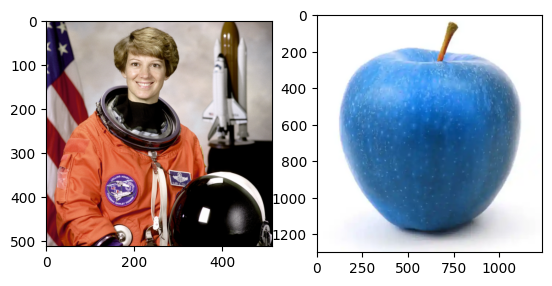

In [22]:
#Con questo frammento di codice carico le due immagini una a fianco all'altra
img1 = data.astronaut() # scikit-image comes already with some images  
img2 = io.imread('FESI/colore/images/apple.png') # or you can load a custom one (see our folder 'images')

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2);

### La struttura dati

In [23]:
#Le due print sono relative alla stessa immagine, non sto analizzando le immagini separate
print("image data type is: {}".format(type(img1))) 
print("image shape is: {}".format(img1.shape))

image data type is: <class 'numpy.ndarray'>
image shape is: (512, 512, 3)


Un'immagine `RGB` è memorizzata in un array tridimensionale(shape = **rows** $\mathbf{\times}$ **columns** $\mathbf{\times}$ **channels**). Possiamo analizzarlo a livelli o layer: le intensità di ogni canale sono memorizzate in una matrice. 


 

In [24]:
R = img1[:,:,0] #prendo tutte le righe e le colonne del canale zero (Rosso)
G = img1[:,:,1]
B = img1[:,:,2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512, 512)
G shape is: (512, 512)
B shape is: (512, 512)


Nota: ogni singolo canale è un'immagine che codifica <i>intensità<i>: diamo un'occhiata ai primi elementi dell'immagine <span style="color:red">rossa</span> 

In [25]:
print(R[:3,:5])

[[154 109  63  54  76]
 [177 144 113 106 128]
 [201 182 168 159 167]]


Qual è il range di valori di ogni singolo canale dell'immagine?

In [26]:
 print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


## Visualizzazione dei canali di colore

Visualizziamo i tre canali: si tratta di tre immagini ad intensità, che misurano la quantità di rosso, di verde e di blu rispettivamente.

NB: Non fatevi ingannare dai falsi colori!!

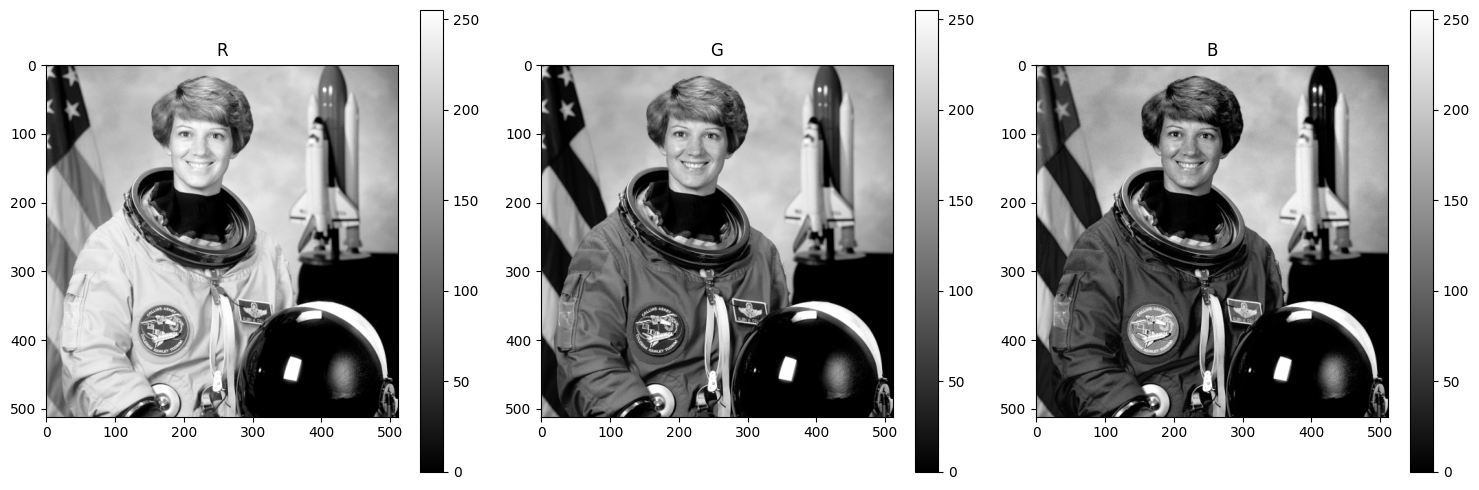

In [27]:
plt.figure(figsize=(15,5))

#Misuro l'intensità del rosso, però usando una scala di grigi (porbabilmente per evidenziare meglio(?))
plt.subplot(1,3,1)
plt.imshow((R), cmap='gray'); #cmap='Reds' <-- falsi colori
plt.colorbar(orientation='vertical')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow((G),cmap='gray'); #cmap='Greens');
plt.title('G')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow((B),cmap='gray');# cmap='Blues');
plt.title('B')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

### Interpretiamo i campi di colore

Proviamo a interpretare i singoli campi di colore. Per fare ciò utilizziamo un'immagine semplice (un solo oggetto su sfondo bianco), ma un pochino fuorviante (la mela è blu!) <br>
Riesco a farmi un'idea sul colore della mela guardando i 3 campi R, G, B? e dello sfondo?

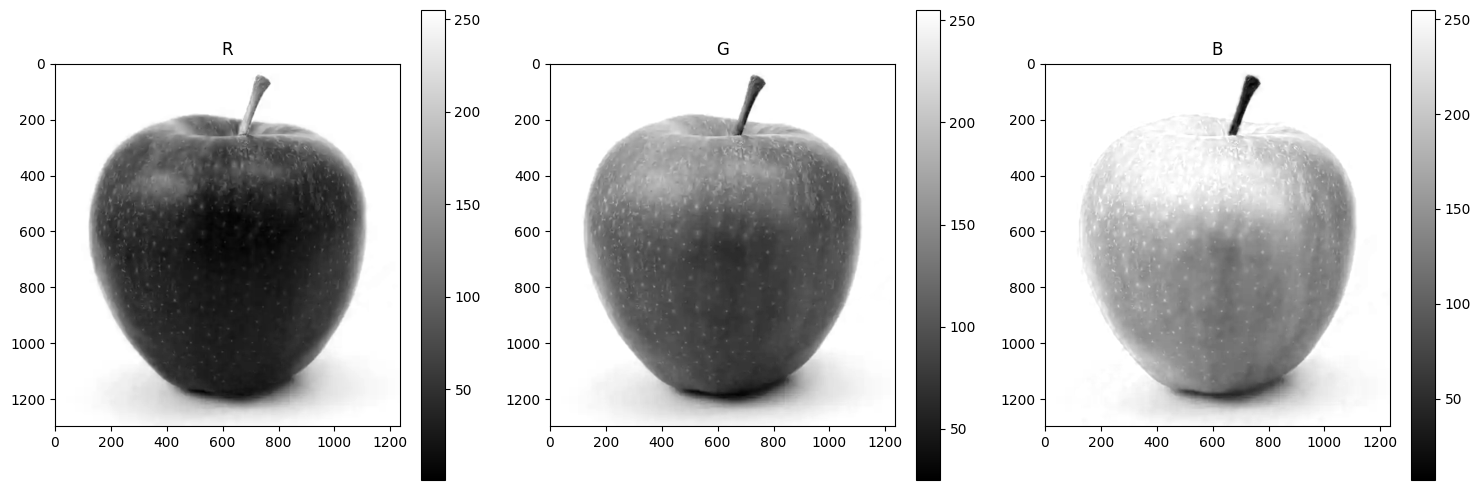

In [28]:
R = img2[:,:,0]
G = img2[:,:,1]
B = img2[:,:,2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow((R), cmap='gray'); #cmap='Reds' <-- falsi colori
plt.colorbar(orientation='vertical')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow((G), cmap='gray');
plt.title('G')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow((B), cmap='gray');
plt.title('B')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

## Conversione dei colori

### <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> to grayscale conversion

Come possiamo trasformare un'immagine a colori in un'immagine a livelli di grigio? Esiste una formula che pesa le componenti in modo adeguato

$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

*I coefficienti rappresentano le intensità percepite dalla rappresentazione tricromatica umana: la sensibilità maggiore è sul verde, la minore sul blu* [cit. <a href="https://en.wikipedia.org/wiki/Grayscale">Wikipedia</a>]

La funzione qui di seguito implementa la conversione

In [29]:
def my_rgb2gray(img):
    return 0.2125 * (img[:,:,0]) + 0.7154 * (img[:,:,1]) + 0.0721 * (img[:,:,2])

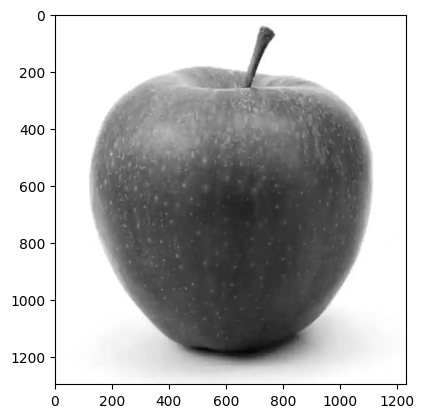

In [30]:
##Code here
plt.imshow(my_rgb2gray(img2), cmap='gray'); # nota la mappa di colori scelta qui

Nella libreria `skimage` esiste una funzione già pronta **<a href="http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray">color.rgb2gray</a>**.

### Da RGB a HSV

Trasformiamo l'immagine in HSV e visualizziamo i tre campi hue, saturation, value. Osservate i range di valori e la complessità nell'analizzare il contenuto dei singoli campi. Siete in grado di spiegarvi il perche' dell'output che visualizzate?

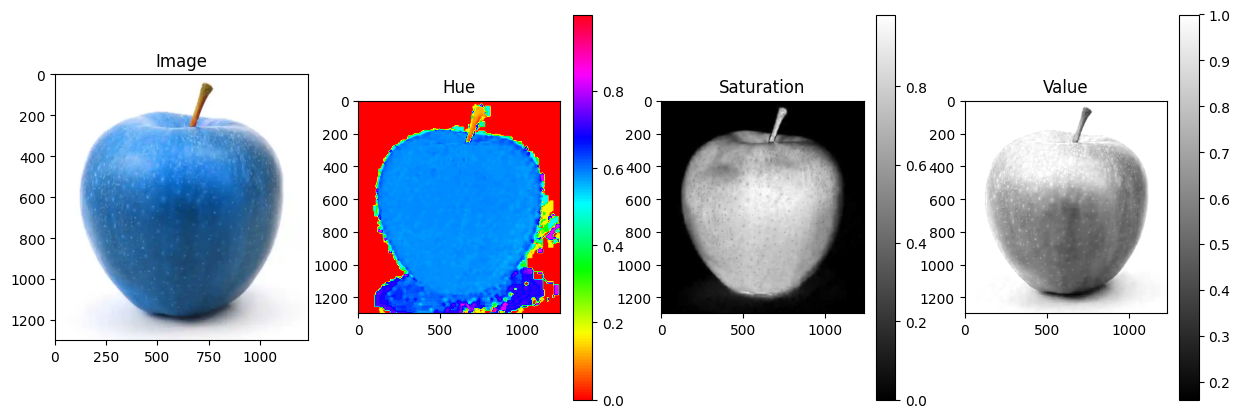

In [31]:
from skimage.color import rgb2hsv
#image = img1
image = img2
hsv_img = rgb2hsv(image[:,:,0:3])
H = hsv_img[:, :, 0]
S = hsv_img[:, :, 1]
V = hsv_img[:, :, 2]

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(image);  
#plt.colorbar(orientation='vertical')
plt.title('Image')

plt.subplot(1,4,2)
plt.imshow((H), cmap='hsv');  
plt.colorbar(orientation='vertical')
plt.title('Hue')

plt.subplot(1,4,3)
plt.imshow(S,cmap='gray');
plt.title('Saturation')
plt.colorbar(orientation='vertical')

plt.subplot(1,4,4)
plt.imshow(V, cmap='gray');
plt.title('Value')
plt.colorbar(orientation='vertical')

#fig.tight_layout()

Lo spazio HSV può essere utile per identificare aree che corrispondono a specifiche tinte ed è molto intuitivo quando ragioniamo sul concetto di similarità tra colori.  

## Segmentazione di colore 

<i>Segmentazione di immagine: </i> un'operazione di elaborazione di immagini che ci permette di identificare aree dell'immagine (componenti connesse) associate ad uno stesso attributo. <br>
<i>Segmentazione di colore: </i> un'operazione di elaborazione di immagini che ci permette di identificare aree dell'immagine (componenti connesse) associate ad uno stesso colore o a colori simili. <br>

<p>Per questo motivo e' importante capire come valutare la similarita' tra colori.</p>

Il modo più semplice per effettuare segmentazione di colore è tramite sogliatura. Parleremo più approfonditamente di di sogliatura nella prossima lezione. Qui la definiamo in modo sommario come un'operazione applicata sull'immagine che ci permette di rilevare elementi il cui valore supera una soglia predefinita.<br>Nel codice notate l'uso dell'operatore relazionale applicato all'intera immagine


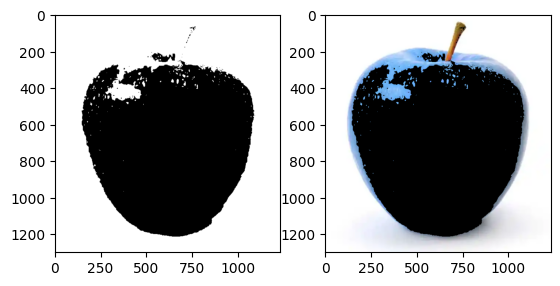

In [32]:
soglia = 100
maskRGB = (R > soglia)

plt.subplot(1,2,1)
plt.imshow(maskRGB, cmap='gray');
#plt.title("in bianco gli elementi che superano la soglia")
mask3=np.copy(img2)
mask3[:,:,0]=mask3[:,:,0]*maskRGB
mask3[:,:,1]=mask3[:,:,1]*maskRGB
mask3[:,:,2]=mask3[:,:,2]*maskRGB
plt.subplot(1,2,2)
plt.imshow(mask3);

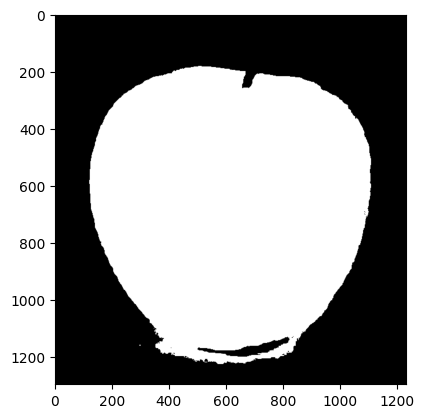

In [33]:
#segmentazione in HSV, le soglie su ogni campo devono essere scelte indipendentemente dal resto
mask = ((H>0.55)&(H<0.75)&(V>0.3)&(S>0.1)) # ha senso?
plt.imshow(mask, cmap='gray');

### Giochiamo con la segmentazione di colore

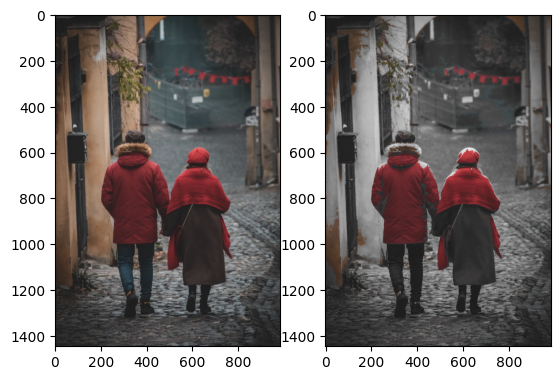

In [34]:
img_coat = io.imread('FESI/colore/images/coats.png')

plt.subplot(1,2,1)
plt.imshow(img_coat);
R=img_coat[:,:,0];
G=img_coat[:,:,1];
B=img_coat[:,:,2];

M=((R>60)&(G<80)&(B<80)) #ho cercato pixel molto rossi
img_red = np.copy(img_coat)
#if M>0 returns the original field value, the red field value 
img_red[:,:,1]=np.where(M>0,img_coat[:,:,1],img_coat[:,:,0]) 
img_red[:,:,2]=np.where(M>0,img_coat[:,:,2],img_coat[:,:,0])

plt.subplot(1,2,2)
plt.imshow(img_red);

## Wrap up
- cosa è un'immagine a colori e come posso convertirla in un'immagine a intensità luminosa
- visualizzare i campi di colore (R,G,B o anche H,S,V) ed essere in grado di commentare le visualizzazioni ottenute. 
- Se vi mostrassi le sole visualizzazioni dei campi di colore sareste in grado di descrivere l'immagine originale?
- Come possiamo realizzare una segmentazione di colore tramite sogliature?
